In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# Load data
Design_space = np.load('Design_space.npy')
moment_capacity = np.load('Mu.npy')

# Check shapes
print("Design_space shape:", Design_space.shape)
print("moment_capacity shape:", moment_capacity.shape)

# Reshape moment_capacity if necessary
if len(moment_capacity.shape) == 1:  # Assuming moment_capacity is 1D
    moment_capacity = moment_capacity.reshape(-1, 1)  # Reshape to a 2D array with one column

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(moment_capacity, Design_space, test_size=0.2, random_state=42)

# Define input and output dimensions
input_dim = X_train.shape[1]
output_dim = Design_space.shape[1]

Design_space shape: (125000, 3)
moment_capacity shape: (125000,)


In [3]:
# Define different neural network architectures
architectures = [
    {'layers': [64, 32], 'dropout': [0.3, 0.3]},
    {'layers': [128, 64, 32], 'dropout': [0.5, 0.5, 0.5]},
    {'layers': [256, 128, 64], 'dropout': [0.2, 0.3, 0.4]}
]

Training model with architecture 1...



Model 1 - Train Loss: 6964.5688, Train MAE: 55.3051, Val Loss: 7021.0239, Val MAE: 55.6205


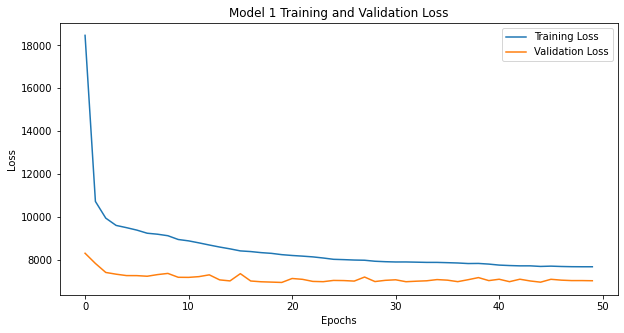

Model 1 saved as model_1.h5

Training model with architecture 2...


C:\Users\adelpasand\AppData\Local\Temp\ipykernel_8376\4033073350.py:37: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, model_path)


Model 2 - Train Loss: 7455.0381, Train MAE: 58.3485, Val Loss: 7495.9482, Val MAE: 58.5943


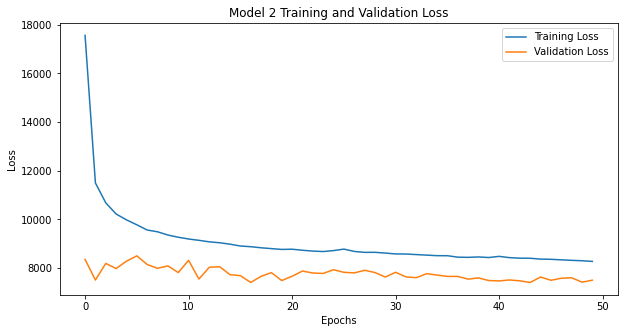

Model 2 saved as model_2.h5

Training model with architecture 3...
Model 3 - Train Loss: 7054.7256, Train MAE: 55.7573, Val Loss: 7110.5728, Val MAE: 56.0750


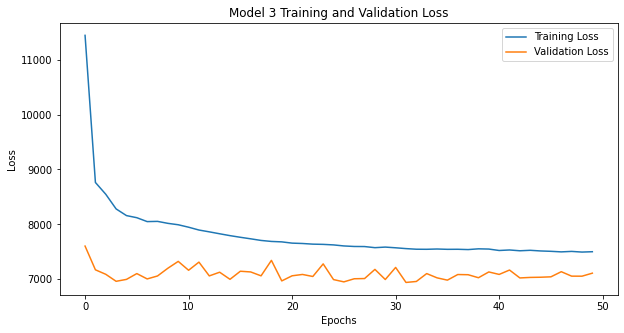

Model 3 saved as model_3.h5



In [4]:
# Train and evaluate models with different architectures
for i, config in enumerate(architectures):
    print(f"Training model with architecture {i+1}...")
    
    # Construct the model
    model = Sequential()
    for j, num_units in enumerate(config['layers']):
        model.add(Dense(num_units, activation='relu', input_dim=input_dim if j == 0 else None))
        if j < len(config['dropout']):
            model.add(Dropout(config['dropout'][j]))
    model.add(Dense(output_dim))
    
    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])  # Using mean squared error loss and mean absolute error metric
    
    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=0)
    
    # Evaluate the model
    train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
    val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
    print(f"Model {i+1} - Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}, Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}")
    
    # Plot training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model {i+1} Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Save the model
    model_path = f'model_{i+1}.h5'
    save_model(model, model_path)
    print(f"Model {i+1} saved as {model_path}\n")